<a href="https://colab.research.google.com/github/duytan118/AI/blob/BTVN/Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN/flowers

/content/drive/MyDrive/Colab Notebooks/BTVN/flowers


In [ ]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/flowers/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 2684 images belonging to 5 classes.


In [ ]:
validation=train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/flowers/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1628 images belonging to 5 classes.


In [ ]:
training_set.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
validation.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=30,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/30
84/84 [==============================] - 1297s 15s/step - loss: 1.5382 - accuracy: 0.3744 - val_loss: 1.3058 - val_accuracy: 0.4220
Epoch 2/30
84/84 [==============================] - 49s 586ms/step - loss: 1.1943 - accuracy: 0.4858 - val_loss: 1.2271 - val_accuracy: 0.4748
Epoch 3/30
84/84 [==============================] - 43s 513ms/step - loss: 1.0799 - accuracy: 0.5745 - val_loss: 1.0789 - val_accuracy: 0.5762
Epoch 4/30
84/84 [==============================] - 48s 577ms/step - loss: 0.9511 - accuracy: 0.6416 - val_loss: 1.0661 - val_accuracy: 0.5928
Epoch 5/30
84/84 [==============================] - 43s 514ms/step - loss: 0.8795 - accuracy: 0.6814 - val_loss: 1.0593 - val_accuracy: 0.5971
Epoch 6/30
84/84 [==============================] - 43s 510ms/step - loss: 0.8029 - accuracy: 0.7012 - val_loss: 1.0049 - val_accuracy: 0.6161
Epoch 7/30
84/84 [==============================] - 43s 514ms/step - loss: 0.7745 - accuracy: 0.7034 - val_loss: 0.9575 - val_accuracy: 0.6499

In [ ]:
# Lưu 
model.save("flowers.h5")
model_1=load_model('flowers.h5')

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.18950586020946503
Train Accuracy 0.9340536594390869


<function matplotlib.pyplot.show(close=None, block=None)>

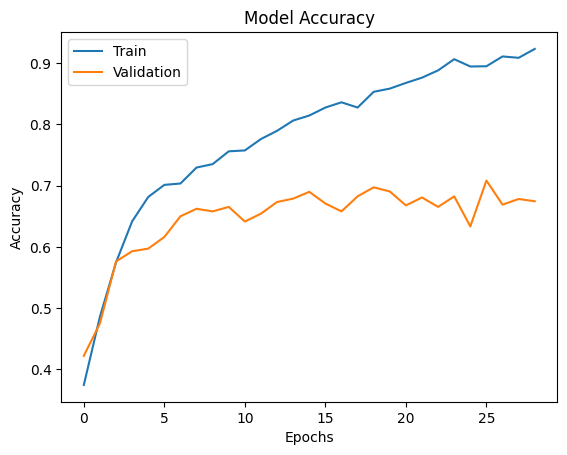

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

1/1 [==============================] - 0s 465ms/step
TULIP


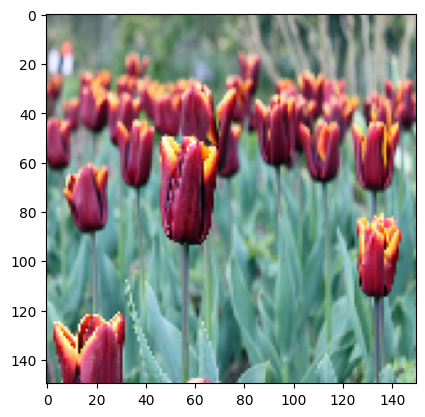

1/1 [==============================] - 0s 22ms/step
HOA HONG


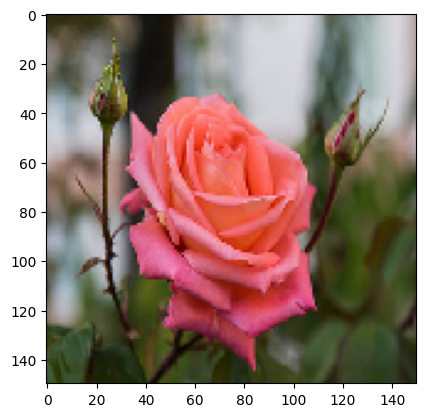

1/1 [==============================] - 0s 21ms/step
HOA CUC


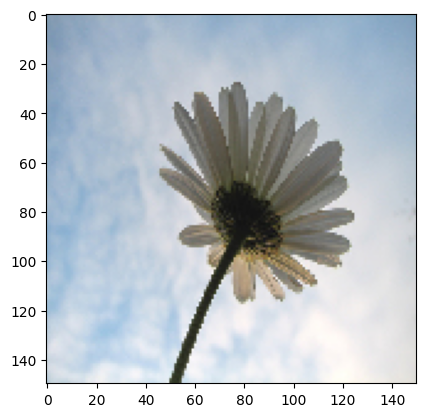

1/1 [==============================] - 0s 29ms/step
HUONG DUONG


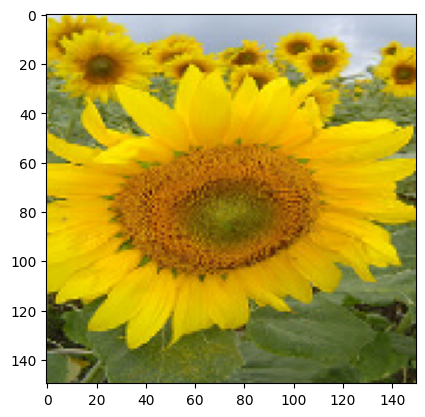

1/1 [==============================] - 0s 31ms/step
BO CONG ANH


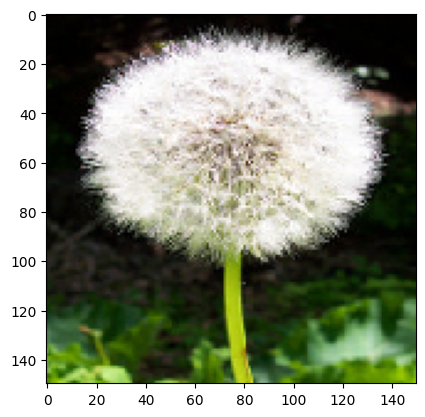

1/1 [==============================] - 0s 29ms/step
BO CONG ANH


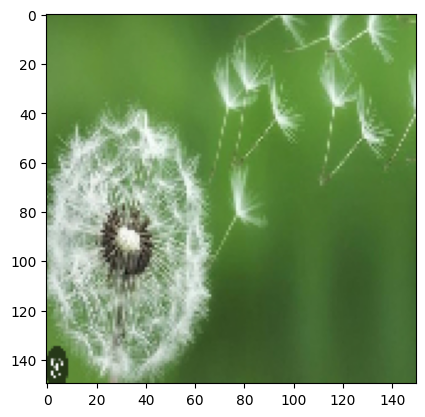

1/1 [==============================] - 0s 23ms/step
HUONG DUONG


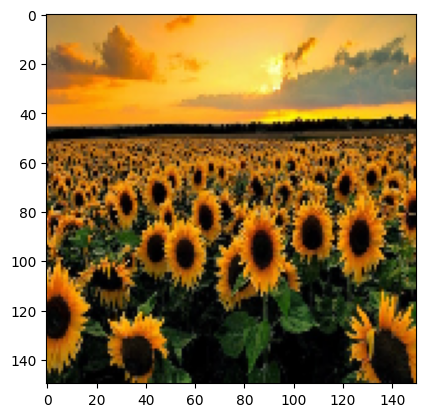

1/1 [==============================] - 0s 19ms/step
HOA CUC


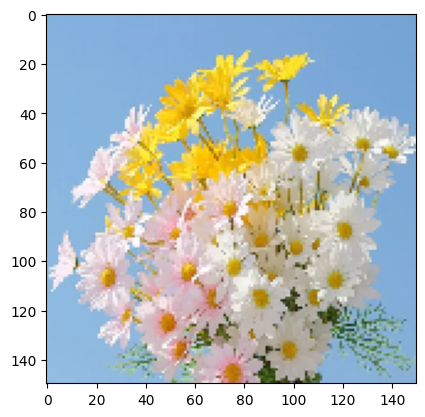

1/1 [==============================] - 0s 19ms/step
TULIP


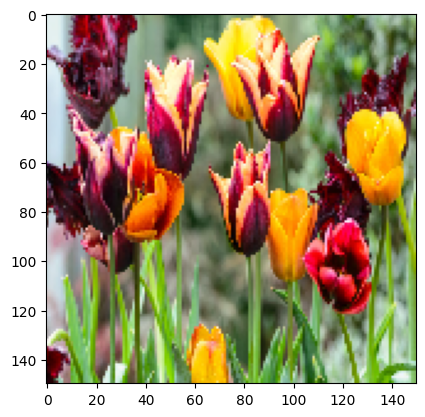

1/1 [==============================] - 0s 26ms/step
TULIP


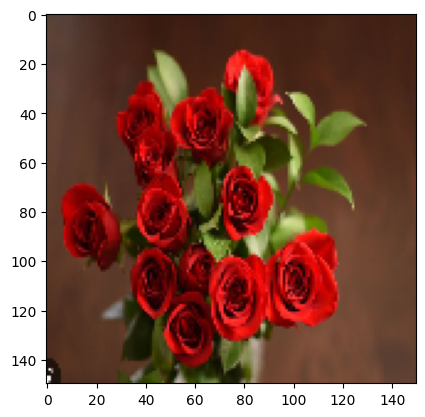

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/BTVN/flowers/test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['HOA CUC','BO CONG ANH','HOA HONG','HUONG DUONG','TULIP']
  print(class_name[result])
  plt.show()